# Test New `research_ferries` Module

Render figure objects returned by `nowcast.research_ferries.salinity_ferry_route()` function.
Provides data for visual testing to confirm that refactoring has not adversely changed figures for web pages.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

In [1]:
from pathlib import Path

import arrow
import netCDF4 as nc
import scipy.io

from nowcast import research_ferries

In [2]:
%matplotlib inline

**NOTE**

The next cell mounts the `/results` filesystem on `skookum` and the `/ocean` filesystem locally.
It is intended for use if when this notebook is run on a laptop or other
non-Waterhole machine that has `sshfs` installed 
and mount points for `/results` and `/ocean` available in its root filesystem.

Don't execute the cell if that doesn't describe your situation.

In [14]:
!sshfs skookum:/results /results
!sshfs skookum:/ocean /ocean

fuse: bad mount point `/results': Input/output error


In [4]:
# Relevant part of config from nowcast.yaml file
config = {
    'bathymetry': '/results/nowcast-sys/NEMO-forcing/grid/bathy_meter_SalishSea2.nc',
    'coastline': '/ocean/rich/more/mmapbase/bcgeo/PNW.mat',
    
    'observations': {
        'ferry data': '/ocean/jieliu/research/meopar/ONC_ferries/',
    },
    
    'run': {
        'results_archive': {
            'nowcast': '/results/SalishSea/nowcast/',
        },
    },
}

In [5]:
run_date = arrow.get('2016-02-25')
run_type = 'nowcast'
dmy = run_date.format('DDMMMYY').lower()

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy

In [6]:
ferry_data_path = config['observations']['ferry data']
grid_T_hr = nc.Dataset(
    str(results_dir/'SalishSea_1h_{0}_{0}_grid_T.nc'
        .format(run_date.format('YYYYMMDD'))))
bathy = nc.Dataset(config['bathymetry']).variables['Bathymetry'][:]
coastline = scipy.io.loadmat(config['coastline'])

1 loops, best of 1: 3.52 s per loop


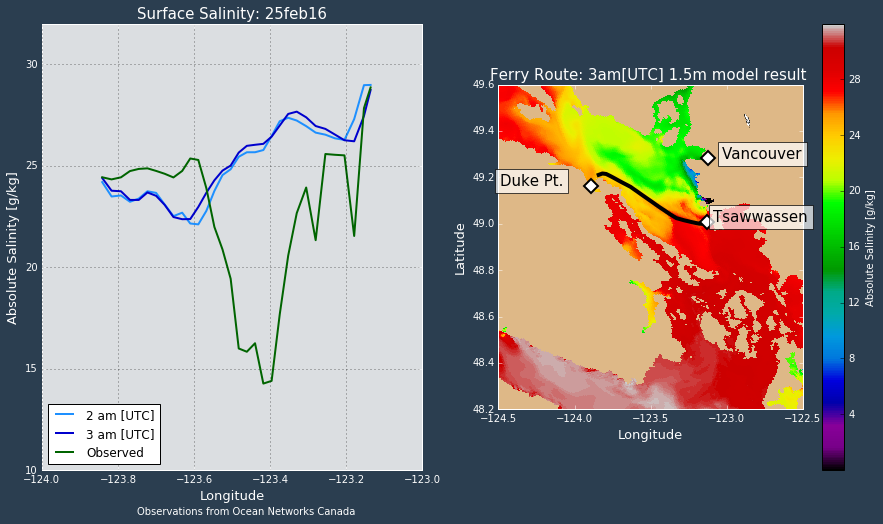

In [8]:
%%timeit -n1 -r1

# Reference rendering of figure

fig = research_ferries.salinity_ferry_route(
    ferry_data_path, grid_T_hr, bathy, coastline, 'TW_DP', dmy)

1 loops, best of 1: 8.6 s per loop


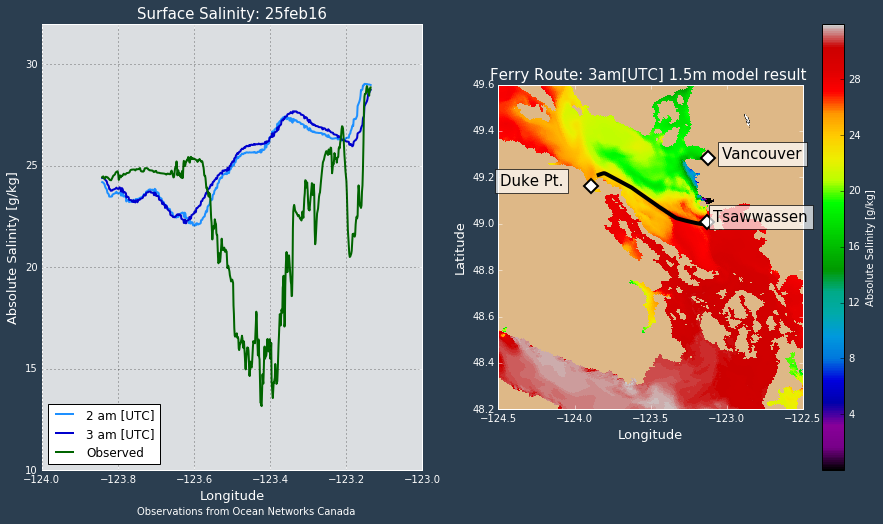

In [15]:
%%timeit -n1 -r1

# Refactored rendering of figure

from importlib import reload
reload(research_ferries)

fig = research_ferries.salinity_ferry_route(
    ferry_data_path, grid_T_hr, bathy, coastline, 'TW_DP', dmy)

In [ ]:
fig = research_ferries.salinity_ferry_route(
    ferry_data_path, grid_T_hr, bathy, coastline, 'TW_SB', dmy)

In [ ]:
fig = research_ferries.salinity_ferry_route(
    ferry_data_path, grid_T_hr, bathy, coastline, 'HB_DB', dmy)